In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("MiningProcess_Flotation_Plant_Database.csv")

### This dataset is about a flotation plant which is a process used to concentrate the iron ore. This process is very common in a mining plant.

### Goal of this dataset

### The main goal is to use this data to predict how much impurity (% Silica Concentrate) is in the ore concentrate. As this impurity is measured every hour, if we can predict how much silica (impurity) is in the ore concentrate, we can help the engineers, giving them early information to take actions (empowering!). Hence, they will be able to take corrective actions in advance (reduce impurity, if it is the case) and also help the environment (reducing the amount of ore that goes to tailings as you reduce silica in the ore concentrate).

### Content :- The first column shows time and date range (from march of 2017 until september of 2017). Some columns were sampled every 20 second. Others were sampled on a hourly base. The second and third columns are quality measures of the iron ore pulp right before it is fed into the flotation plant. Column 4 until column 8 are the most important variables that impact in the ore quality in the end of the process. From column 9 until column 22, we can see process data (level and air flow inside the flotation columns, which also impact in ore quality). The last two columns are the final iron ore pulp quality measurement from the lab. Target is to predict the last column, which is the % of silica in the iron ore concentrate.


In [3]:
df.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,"55,2","16,98","3019,53","557,434","395,713","10,0664","1,74","249,214","253,235",...,"250,884","457,396","432,962","424,954","443,558","502,255","446,37","523,344","66,91","1,31"
1,2017-03-10 01:00:00,"55,2","16,98","3024,41","563,965","397,383","10,0672","1,74","249,719","250,532",...,"248,994","451,891","429,56","432,939","448,086","496,363","445,922","498,075","66,91","1,31"
2,2017-03-10 01:00:00,"55,2","16,98","3043,46","568,054","399,668","10,068","1,74","249,741","247,874",...,"248,071","451,24","468,927","434,61","449,688","484,411","447,826","458,567","66,91","1,31"
3,2017-03-10 01:00:00,"55,2","16,98","3047,36","568,665","397,939","10,0689","1,74","249,917","254,487",...,"251,147","452,441","458,165","442,865","446,21","471,411","437,69","427,669","66,91","1,31"
4,2017-03-10 01:00:00,"55,2","16,98","3033,69","558,167","400,254","10,0697","1,74","250,203","252,136",...,"248,928","452,441","452,9","450,523","453,67","462,598","443,682","425,679","66,91","1,31"


### We will check info of dataset as well any null value present in dataset.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   date                          737453 non-null  object
 1   % Iron Feed                   737453 non-null  object
 2   % Silica Feed                 737453 non-null  object
 3   Starch Flow                   737453 non-null  object
 4   Amina Flow                    737453 non-null  object
 5   Ore Pulp Flow                 737453 non-null  object
 6   Ore Pulp pH                   737453 non-null  object
 7   Ore Pulp Density              737453 non-null  object
 8   Flotation Column 01 Air Flow  737453 non-null  object
 9   Flotation Column 02 Air Flow  737453 non-null  object
 10  Flotation Column 03 Air Flow  737453 non-null  object
 11  Flotation Column 04 Air Flow  737453 non-null  object
 12  Flotation Column 05 Air Flow  737453 non-null  object
 13 

In [5]:
df.isnull().sum()

date                            0
% Iron Feed                     0
% Silica Feed                   0
Starch Flow                     0
Amina Flow                      0
Ore Pulp Flow                   0
Ore Pulp pH                     0
Ore Pulp Density                0
Flotation Column 01 Air Flow    0
Flotation Column 02 Air Flow    0
Flotation Column 03 Air Flow    0
Flotation Column 04 Air Flow    0
Flotation Column 05 Air Flow    0
Flotation Column 06 Air Flow    0
Flotation Column 07 Air Flow    0
Flotation Column 01 Level       0
Flotation Column 02 Level       0
Flotation Column 03 Level       0
Flotation Column 04 Level       0
Flotation Column 05 Level       0
Flotation Column 06 Level       0
Flotation Column 07 Level       0
% Iron Concentrate              0
% Silica Concentrate            0
dtype: int64

### From above information we can see that there is no null value in data but all the column are in numeric form and their datatype is object. 

### We will do value counts of all columns

In [6]:
for i in df.columns:
    print(df[i].value_counts())

2017-06-16 15:00:00    180
2017-06-16 16:00:00    180
2017-07-14 18:00:00    180
2017-07-14 19:00:00    180
2017-07-14 20:00:00    180
                      ... 
2017-05-19 11:00:00    180
2017-05-19 12:00:00    180
2017-05-19 13:00:00    180
2017-04-10 00:00:00    179
2017-03-10 01:00:00    174
Name: date, Length: 4097, dtype: int64
64,03    142560
57,46     45900
48,81     34560
52,61     14580
55,17     12960
          ...  
54,57      1080
55,26      1080
45,71      1080
55,2       1074
57,45       900
Name: % Iron Feed, Length: 278, dtype: int64
6,26     142560
10,8      45900
25,31     34560
20,24     14580
14,35     12960
          ...  
13,38      1080
15,05      1080
16,98      1074
12,95       900
9,34        720
Name: % Silica Feed, Length: 293, dtype: int64
2562,5            690
2173,83           386
1835,94           280
5091,8            205
1888,67           159
                 ... 
4445,96             1
4413,37             1
4406,18             1
4398,99             1


### From above we can see that we need to do cleaning on all column as well need to convert all column into float. We will drop date column also, which is least important in data.

In [7]:
df.drop(["date"],axis=1,inplace=True)

In [8]:
for i in df.columns:
  df[i]=df[i].str.replace(',','.').astype(float)

In [9]:
df.head()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,250.576,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,250.862,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,250.313,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,250.049,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,249.895,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


### After cleaning the data we got the above dataset. Now we will check the corelation of independent variable with target column and drop the columns which are in less corelation with target column. 

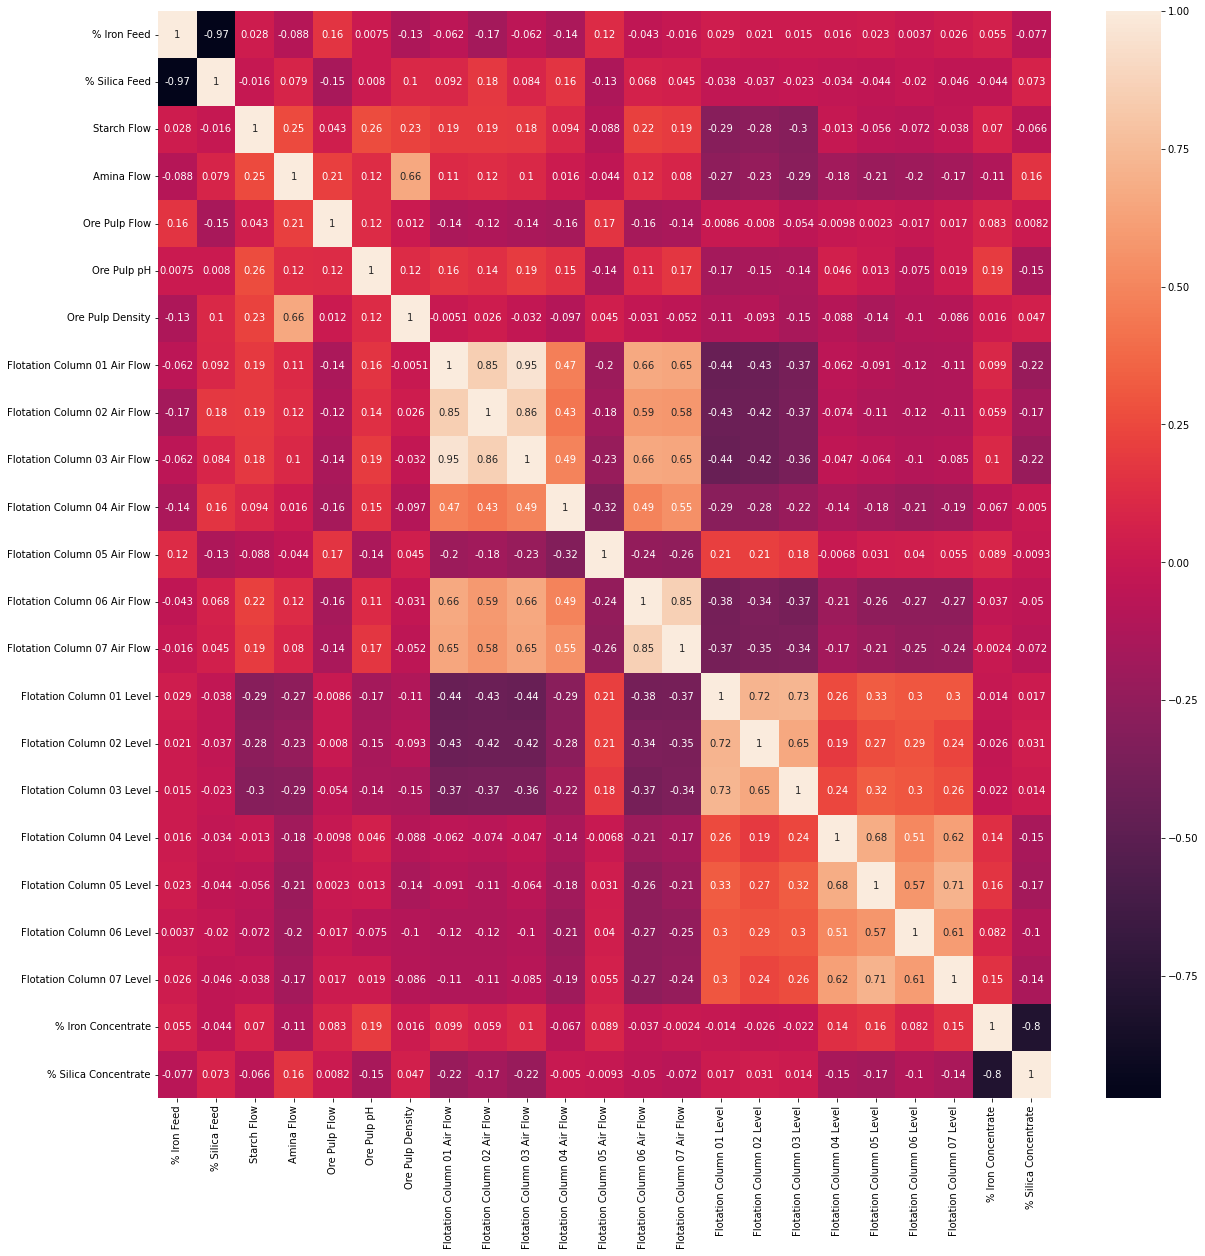

In [10]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)
plt.show()

### From above heatmap it has been seen that the coumns which are less corelated with target columns are: %Iron feed, Starch Flow, Ore Pulp Flow, Floatation Column 04 Air Flow, Floatation Column 05 Air Flow, Floatation Column 06 Air Flow, Floatation Column 07 Air Flow, Flotation Column 01 Level, Flotation Column 02 Level, Flotation Column 03 Level.  So we will drop this column and keep rest of the column.

### We will seperate x and y and split the data.

In [11]:
x=df[["% Silica Feed","Amina Flow","Ore Pulp pH","Ore Pulp Density","Flotation Column 01 Air Flow","Flotation Column 02 Air Flow","Flotation Column 03 Air Flow","Flotation Column 04 Level","Flotation Column 05 Level","Flotation Column 06 Level","Flotation Column 07 Level","% Iron Concentrate"]]

In [12]:
x

,% Silica Feed,Amina Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate
0,16.98,557.434,10.06640,1.74000,249.214,253.235,250.576,443.558,502.255,446.370,523.344,66.91
1,16.98,563.965,10.06720,1.74000,249.719,250.532,250.862,448.086,496.363,445.922,498.075,66.91
2,16.98,568.054,10.06800,1.74000,249.741,247.874,250.313,449.688,484.411,447.826,458.567,66.91
3,16.98,568.665,10.06890,1.74000,249.917,254.487,250.049,446.210,471.411,437.690,427.669,66.91
4,16.98,558.167,10.06970,1.74000,250.203,252.136,249.895,453.670,462.598,443.682,425.679,66.91
...,...,...,...,...,...,...,...,...,...,...,...,...
737448,23.20,441.052,9.62129,1.65365,302.344,298.786,299.163,418.725,497.548,446.357,416.892,64.27
737449,23.20,473.436,9.62063,1.65352,303.013,301.879,299.487,418.377,506.398,372.995,426.337,64.27
737450,23.20,500.488,9.61874,1.65338,303.662,307.397,299.487,419.531,503.414,336.035,433.130,64.27
737451,23.20,491.548,9.61686,1.65324,302.550,301.959,298.045,407.299,502.301,340.844,433.966,64.27


In [13]:
y=df["% Silica Concentrate"]

In [14]:
y

0         1.31
1         1.31
2         1.31
3         1.31
4         1.31
          ... 
737448    1.71
737449    1.71
737450    1.71
737451    1.71
737452    1.71
Name: % Silica Concentrate, Length: 737453, dtype: float64

In [15]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [16]:
from sklearn.preprocessing import StandardScaler

### After splitting the data we will standardize it and build the model. 

In [17]:
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [19]:
ann=Sequential()
ann.add(Dense(units=20,activation='relu'))
ann.add(Dense(units=10,activation='relu'))
ann.add(Dense(units=1))
ann.compile('Adam',loss='mse',metrics=['accuracy'])
ann.fit(xtrain,ytrain,validation_data=(xtest,ytest),verbose=1,batch_size=120,epochs=50)
ypred=ann.predict(xtest)

Epoch 1/50
4302/4302 [==============================] - 20s 4ms/step - loss: 0.4287 - accuracy: 0.0036 - val_loss: 0.3307 - val_accuracy: 0.0037
Epoch 2/50
4302/4302 [==============================] - 16s 4ms/step - loss: 0.3177 - accuracy: 0.0036 - val_loss: 0.3099 - val_accuracy: 0.0037
Epoch 3/50
4302/4302 [==============================] - 17s 4ms/step - loss: 0.3056 - accuracy: 0.0036 - val_loss: 0.3032 - val_accuracy: 0.0037
Epoch 4/50
4302/4302 [==============================] - 16s 4ms/step - loss: 0.2996 - accuracy: 0.0036 - val_loss: 0.2999 - val_accuracy: 0.0037
Epoch 5/50
4302/4302 [==============================] - 16s 4ms/step - loss: 0.2955 - accuracy: 0.0036 - val_loss: 0.2938 - val_accuracy: 0.0037
Epoch 6/50
4302/4302 [==============================] - 16s 4ms/step - loss: 0.2925 - accuracy: 0.0036 - val_loss: 0.2920 - val_accuracy: 0.0037
Epoch 7/50
4302/4302 [==============================] - 16s 4ms/step - loss: 0.2904 - accuracy: 0.0036 - val_loss: 0.2877 - val_ac

In [20]:
from sklearn.metrics import r2_score
r2_score(ytest,ypred)

0.787788028720072

### We now check whether the model is overfitted or underfitted or not.

In [21]:
ann.evaluate(xtrain,ytrain)

16132/16132 [==============================] - 36s 2ms/step - loss: 0.2690 - accuracy: 0.0036


[0.2689618766307831, 0.003624444827437401]

In [22]:
ann.evaluate(xtest,ytest)

6914/6914 [==============================] - 16s 2ms/step - loss: 0.2695 - accuracy: 0.0037


[0.26946693658828735, 0.003747129812836647]

### As there is not much difference between training and testing error. Means model is neither overfitted nor underfitted.

### We now further hypertun the model.

In [23]:
annh=Sequential()
annh.add(Dense(units=60,activation='relu'))
annh.add(Dense(units=40,activation='relu'))
annh.add(Dense(units=1))
annh.compile('Adam',loss='mse',metrics=['accuracy'])
annh.fit(xtrain,ytrain,validation_data=(xtest,ytest),verbose=1,batch_size=120,epochs=100)

Epoch 1/100
4302/4302 [==============================] - 15s 3ms/step - loss: 0.3366 - accuracy: 0.0036 - val_loss: 0.2745 - val_accuracy: 0.0037
Epoch 2/100
4302/4302 [==============================] - 15s 4ms/step - loss: 0.2630 - accuracy: 0.0036 - val_loss: 0.2501 - val_accuracy: 0.0037
Epoch 3/100
4302/4302 [==============================] - 16s 4ms/step - loss: 0.2442 - accuracy: 0.0036 - val_loss: 0.2361 - val_accuracy: 0.0037
Epoch 4/100
4302/4302 [==============================] - 16s 4ms/step - loss: 0.2322 - accuracy: 0.0036 - val_loss: 0.2286 - val_accuracy: 0.0037
Epoch 5/100
4302/4302 [==============================] - 16s 4ms/step - loss: 0.2240 - accuracy: 0.0036 - val_loss: 0.2235 - val_accuracy: 0.0037
Epoch 6/100
4302/4302 [==============================] - 16s 4ms/step - loss: 0.2177 - accuracy: 0.0036 - val_loss: 0.2166 - val_accuracy: 0.0037
Epoch 7/100
4302/4302 [==============================] - 16s 4ms/step - loss: 0.2130 - accuracy: 0.0036 - val_loss: 0.2112 -

Epoch 57/100
4302/4302 [==============================] - 15s 4ms/step - loss: 0.1619 - accuracy: 0.0036 - val_loss: 0.1598 - val_accuracy: 0.0037
Epoch 58/100
4302/4302 [==============================] - 16s 4ms/step - loss: 0.1618 - accuracy: 0.0036 - val_loss: 0.1603 - val_accuracy: 0.0037
Epoch 59/100
4302/4302 [==============================] - 16s 4ms/step - loss: 0.1614 - accuracy: 0.0036 - val_loss: 0.1601 - val_accuracy: 0.0037
Epoch 60/100
4302/4302 [==============================] - 16s 4ms/step - loss: 0.1613 - accuracy: 0.0036 - val_loss: 0.1629 - val_accuracy: 0.0037
Epoch 61/100
4302/4302 [==============================] - 15s 4ms/step - loss: 0.1610 - accuracy: 0.0036 - val_loss: 0.1617 - val_accuracy: 0.0037
Epoch 62/100
4302/4302 [==============================] - 16s 4ms/step - loss: 0.1607 - accuracy: 0.0036 - val_loss: 0.1597 - val_accuracy: 0.0037
Epoch 63/100
4302/4302 [==============================] - 16s 4ms/step - loss: 0.1607 - accuracy: 0.0036 - val_loss: 0

In [24]:
ypred1=annh.predict(xtest)

6914/6914 [==============================] - 15s 2ms/step


In [25]:
r2_score(ytest,ypred1)

0.8786308905437665

### After hypertunning the accuracy reached to 88%
### We will now make the prediction

In [28]:
m=annh.predict([[xtest[3:4]]])[0]
m[0]

1/1 [==============================] - 0s 110ms/step


1.9529122

In [30]:
ytest[3:4]

508239    2.07
Name: % Silica Concentrate, dtype: float64